In [127]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns
sns.set_style('white')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
from pandas.plotting import parallel_coordinates

from ipywidgets import interact
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [165]:
df = pd.read_csv('/home/ukjung18/project/disabledFacility.csv')

In [166]:
df.columns = ['기관명', 'WGS84위도', 'WGS84경도']

In [167]:
df

,기관명,WGS84위도,WGS84경도
0,고양시발달장애인지원센터,37.660655,126.830347
1,고양시장애인가족지원센터,37.660655,126.830347
2,광명시장애인가족지원센터,37.459406,126.876809
3,광명언어심리발달센터,37.447650,126.884979
4,구리시장애인가족지원센터,37.591796,127.141059
...,...,...,...
421,의료법인 원광의료재단 원광종합병원,37.210062,127.008030
422,더퍼스트요양병원,37.207012,127.036257
423,의료법인상운의료재단 동탄제일병원,37.216545,127.078499
424,한림대학교동탄성심병원,37.216496,127.079942


In [168]:
df_sub = df[['WGS84위도', 'WGS84경도']]

In [230]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 4,
    "max_iter": 300,
    "random_state": 42,
}

In [231]:
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_sub)
    sse.append(kmeans.inertia_)

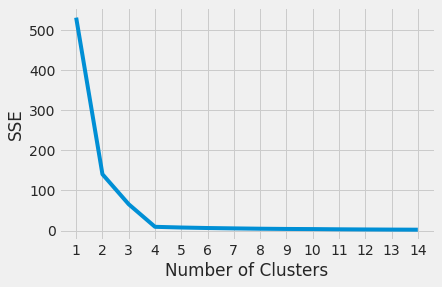

In [232]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [233]:
# n_clusters=5
km = KMeans(n_clusters=4, **kmeans_kwargs)
y_km = km.fit_predict(df_sub)

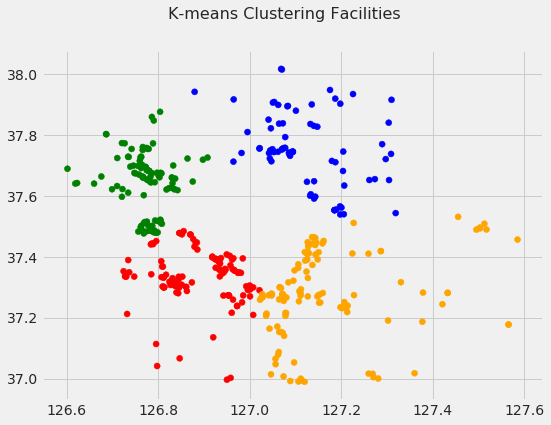

In [234]:
fig, ax = plt.subplots(
    figsize=(8, 6)
)
fig.suptitle(f"K-means Clustering Facilities", fontsize=16)

fte_colors = {
    0: 'red',
    1: 'orange',
    2: 'green',
    3: 'blue',
}
# The k-means plot
km_colors = [fte_colors[label] for label in km.labels_]
ax.scatter(df_sub['WGS84경도'], df_sub['WGS84위도'], c=km_colors)

In [235]:
df['label'] = y_km

In [236]:
df.to_csv("facilityClustered.csv", mode='w', index=False)